Cloning into 'CompVisionAssignment'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 88 (delta 14), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (88/88), 16.30 MiB | 20.38 MiB/s, done.
Resolving deltas: 100% (14/14), done.
/content/CompVisionAssignment/CompVisionAssignment


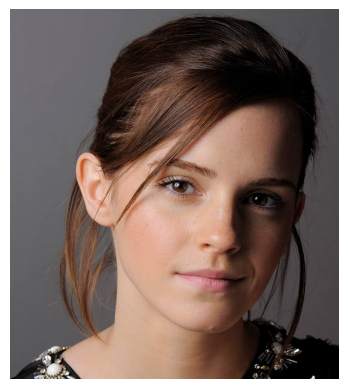

In [24]:
!git clone https://github.com/piumixit/CompVisionAssignment

%cd CompVisionAssignment

from PIL import Image
import matplotlib.pyplot as plt

image_path = 'image/emma.jpg'
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

1. Implement the intensity transformation depicted in Fig. 1a on the image shown in Fig. 1b.

101
50
105
256


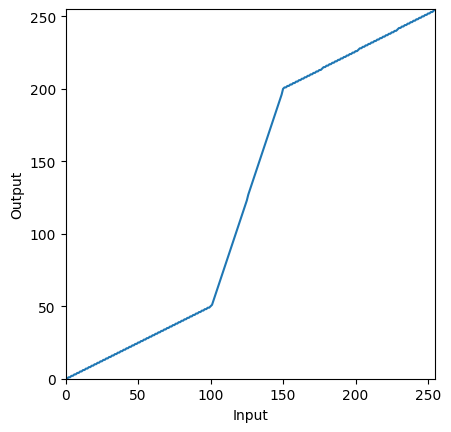

Text(0.5, 1.0, 'Transformed Image')

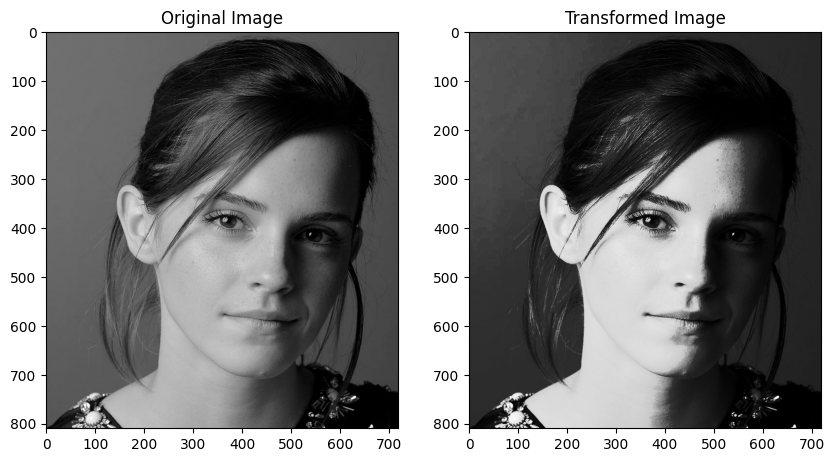

In [3]:
import cv2
import numpy as np

c = np.array([(100, 50), (150, 200)])

t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
print(len(t1))
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
print(len(t2))
t3 = np.linspace(c[1,1] + 1, 255, 255 - c[1,0]).astype('uint8')
print(len(t3))

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel('Input')
ax.set_ylabel('Output')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.show()

img = cv2.imread('image/emma.jpg', cv2.IMREAD_GRAYSCALE)
if img is None:
  print(f"Error: Could not load image at {img}")

out = cv2.LUT(img, transform)
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(out, cmap='gray')
ax[1].set_title('Transformed Image')

2. Apply a similar operation as above (question 1) to accentuate
(a) white matter
(b) gray matter
in the brain proton density image shown in Fig. 2. Show the intensity transformations as a plots

/tmp/ipython-input-3968742479.py:51: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(), 256, [0, 256])


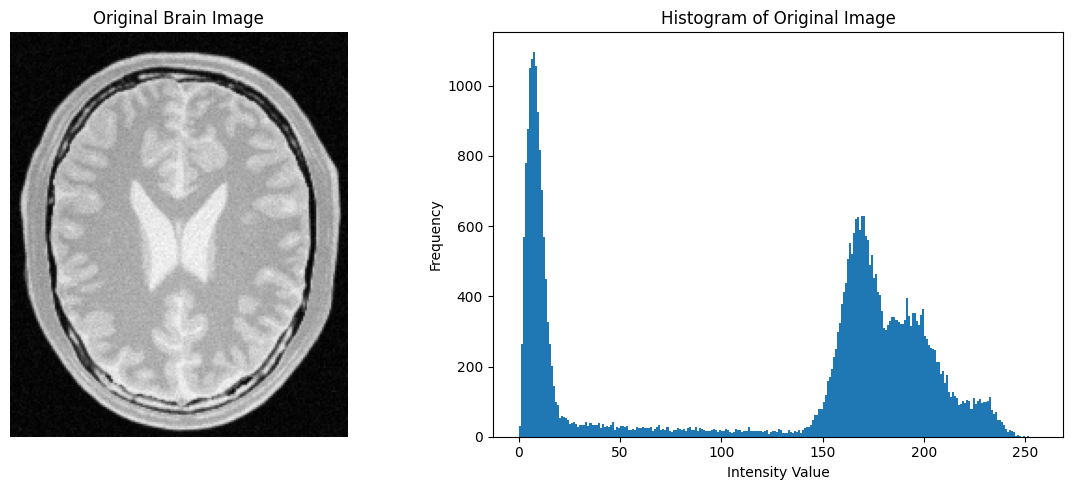

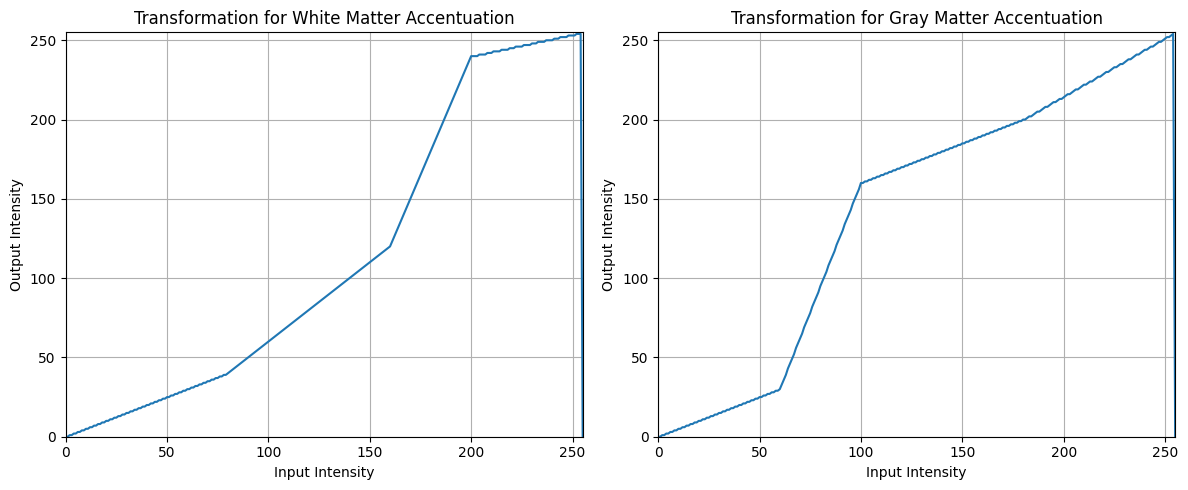

/tmp/ipython-input-3968742479.py:151: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axes[0, 1].hist(white_matter_img.ravel(), 256, [0, 256])
/tmp/ipython-input-3968742479.py:161: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axes[1, 1].hist(gray_matter_img.ravel(), 256, [0, 256])


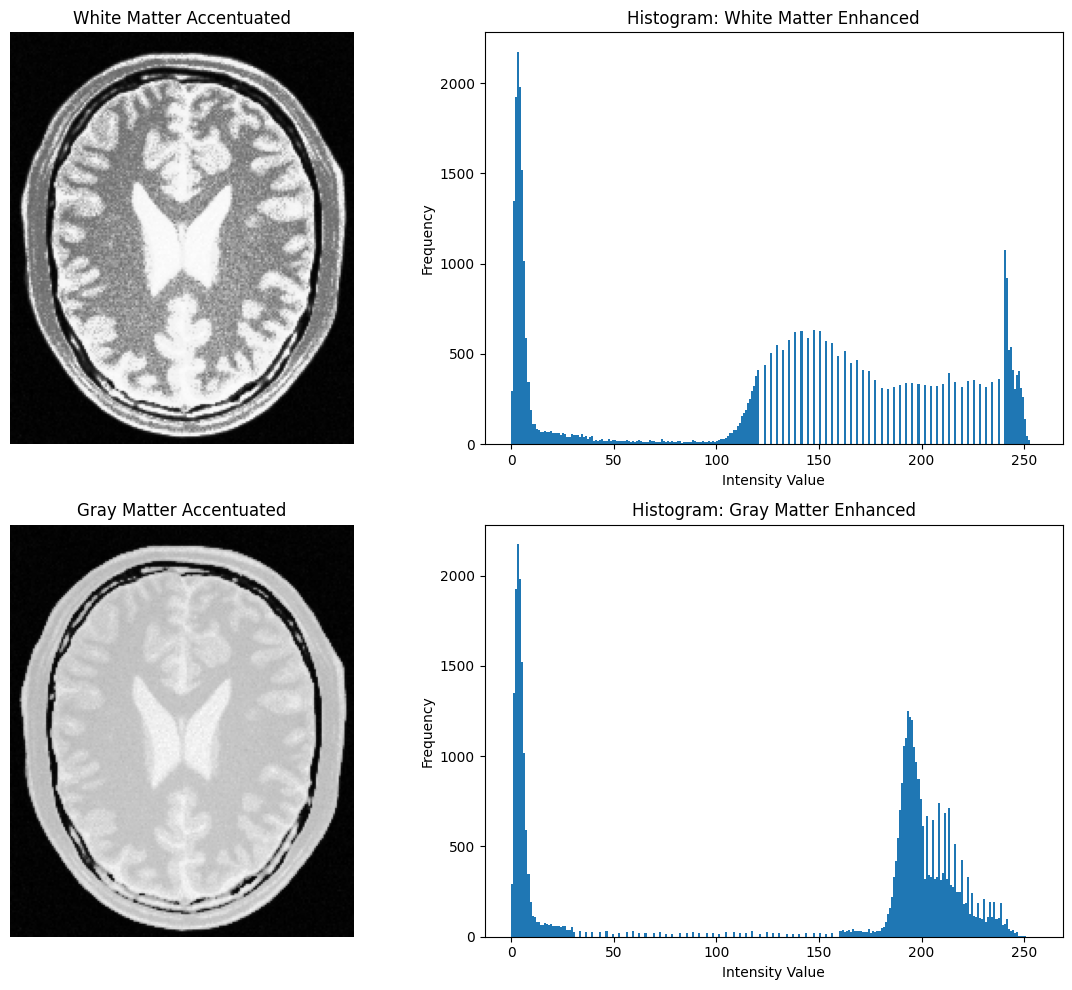

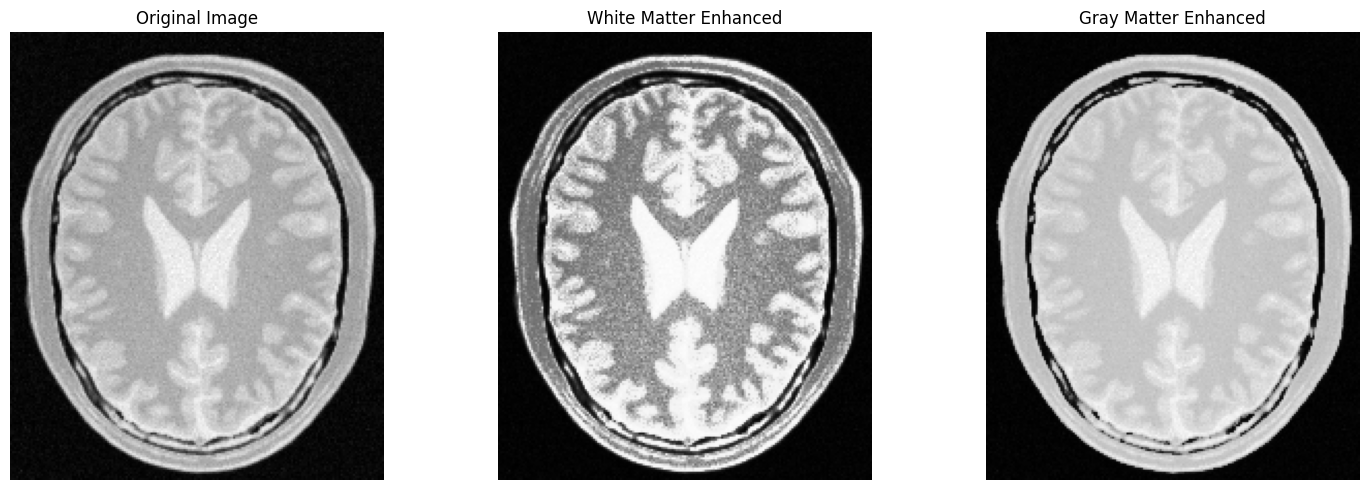

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a sample brain proton density image if not available
def create_sample_brain_image():
    # Create a synthetic brain-like image with different tissue types
    img = np.zeros((300, 300), dtype=np.uint8)

    # Create background
    img += np.random.normal(30, 5, (300, 300)).astype(np.uint8)

    # Create brain outline (ellipse)
    cv2.ellipse(img, (150, 150), (120, 100), 0, 0, 360, 80, -1)

    # Add ventricles (darker regions)
    cv2.ellipse(img, (150, 150), (40, 30), 0, 0, 360, 40, -1)
    cv2.ellipse(img, (100, 120), (20, 15), 0, 0, 360, 40, -1)
    cv2.ellipse(img, (200, 120), (20, 15), 0, 0, 360, 40, -1)

    # Add white matter (brighter regions)
    cv2.ellipse(img, (150, 150), (70, 50), 0, 0, 360, 180, -1)
    cv2.ellipse(img, (150, 180), (50, 30), 0, 0, 360, 180, -1)

    # Add gray matter (medium intensity)
    cv2.ellipse(img, (150, 150), (90, 70), 0, 0, 360, 120, -1)
    cv2.ellipse(img, (150, 180), (70, 50), 0, 0, 360, 120, -1)

    # Add some noise to make it more realistic
    noise = np.random.normal(0, 5, (300, 300)).astype(np.uint8)
    img = cv2.add(img, noise)

    return img

# Load or create the brain image
img_path = 'image/brain_proton_density_slice.png'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Creating sample brain proton density image for demonstration")
    img = create_sample_brain_image()

# Display original image and its histogram
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Brain Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(img.ravel(), 256, [0, 256])
plt.title('Histogram of Original Image')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Function to create piecewise linear transformation
def create_piecewise_transform(control_points):
    # Sort control points by x value
    control_points = control_points[control_points[:, 0].argsort()]

    # Initialize transformation array
    transform = np.zeros(256, dtype=np.uint8)

    # Add starting point (0,0)
    if control_points[0, 0] > 0:
        x_vals = np.array([0, control_points[0, 0]])
        y_vals = np.array([0, control_points[0, 1]])
        transform[0:control_points[0, 0]] = np.interp(
            np.arange(0, control_points[0, 0]), x_vals, y_vals)

    # Process each segment
    for i in range(len(control_points) - 1):
        x_start, y_start = control_points[i]
        x_end, y_end = control_points[i + 1]

        transform[x_start:x_end] = np.interp(
            np.arange(x_start, x_end),
            [x_start, x_end],
            [y_start, y_end]
        ).astype(np.uint8)

    # Add ending point (255,255)
    if control_points[-1, 0] < 255:
        x_vals = np.array([control_points[-1, 0], 255])
        y_vals = np.array([control_points[-1, 1], 255])
        transform[control_points[-1, 0]:256] = np.interp(
            np.arange(control_points[-1, 0], 256), x_vals, y_vals).astype(np.uint8)

    return transform

# Transformation to accentuate WHITE MATTER (brighter regions)
# This transformation will enhance bright pixels and compress darker ones
white_matter_points = np.array([
    [0, 0],        # Dark areas remain dark
    [80, 40],      # Compress gray matter range
    [160, 120],    # Slight enhancement of brighter grays
    [200, 240],    # Significant enhancement of white matter
    [255, 255]     # Maximum white stays white
])

white_matter_transform = create_piecewise_transform(white_matter_points)
white_matter_img = cv2.LUT(img, white_matter_transform)

# Transformation to accentuate GRAY MATTER (medium intensity regions)
# This transformation will enhance medium intensity pixels
gray_matter_points = np.array([
    [0, 0],        # Dark areas remain dark
    [60, 30],      # Compress dark gray range
    [100, 160],    # Significant enhancement of gray matter
    [180, 200],    # Slight compression of white matter
    [255, 255]     # Maximum white stays white
])

gray_matter_transform = create_piecewise_transform(gray_matter_points)
gray_matter_img = cv2.LUT(img, gray_matter_transform)

# Plot the transformation functions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(white_matter_transform)
plt.title('Transformation for White Matter Accentuation')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid(True)
plt.xlim(0, 255)
plt.ylim(0, 255)

plt.subplot(1, 2, 2)
plt.plot(gray_matter_transform)
plt.title('Transformation for Gray Matter Accentuation')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid(True)
plt.xlim(0, 255)
plt.ylim(0, 255)

plt.tight_layout()
plt.show()

# Display the results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# White matter results
axes[0, 0].imshow(white_matter_img, cmap='gray')
axes[0, 0].set_title('White Matter Accentuated')
axes[0, 0].axis('off')

axes[0, 1].hist(white_matter_img.ravel(), 256, [0, 256])
axes[0, 1].set_title('Histogram: White Matter Enhanced')
axes[0, 1].set_xlabel('Intensity Value')
axes[0, 1].set_ylabel('Frequency')

# Gray matter results
axes[1, 0].imshow(gray_matter_img, cmap='gray')
axes[1, 0].set_title('Gray Matter Accentuated')
axes[1, 0].axis('off')

axes[1, 1].hist(gray_matter_img.ravel(), 256, [0, 256])
axes[1, 1].set_title('Histogram: Gray Matter Enhanced')
axes[1, 1].set_xlabel('Intensity Value')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Compare all images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(white_matter_img, cmap='gray')
plt.title('White Matter Enhanced')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gray_matter_img, cmap='gray')
plt.title('Gray Matter Enhanced')
plt.axis('off')

plt.tight_layout()
plt.show()

3. Consider the image shown in Fig. 31.
(a) Apply gamma correction to the L plane in the L∗a∗b∗ color space and state the γ value.
(b) Show the histograms of the original and corrected images

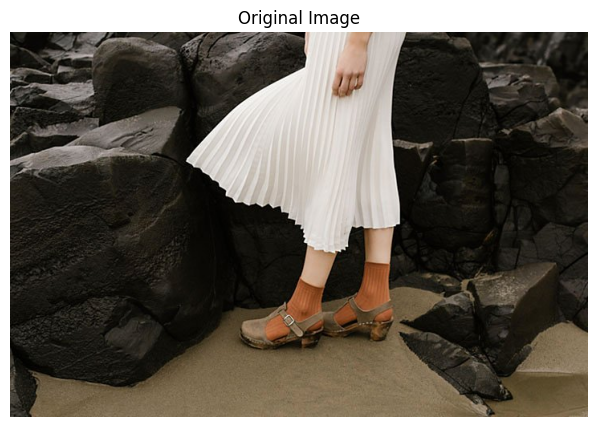

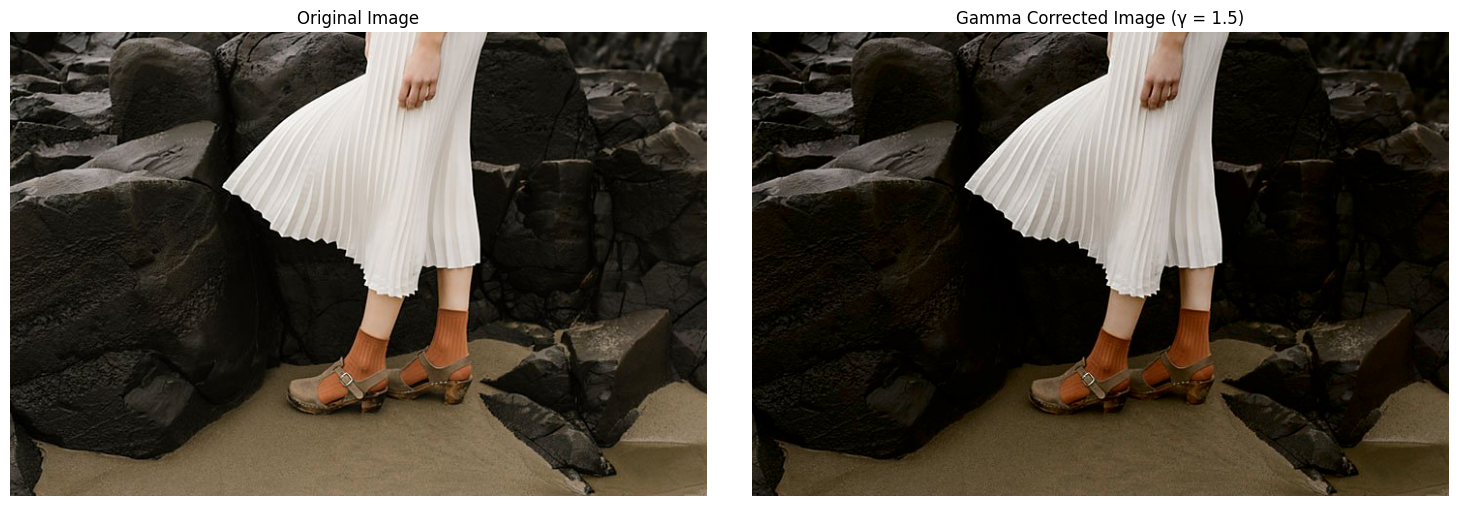

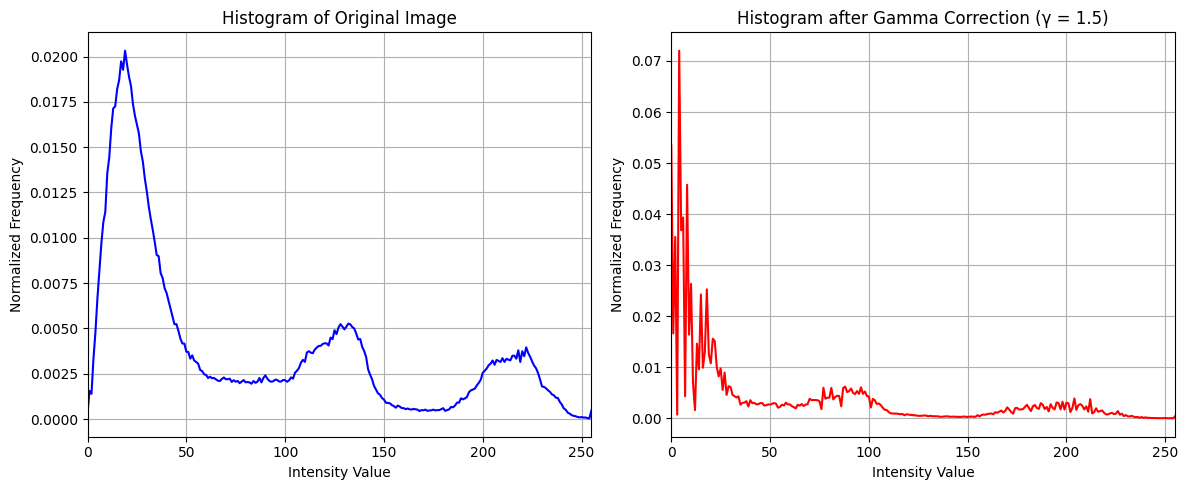

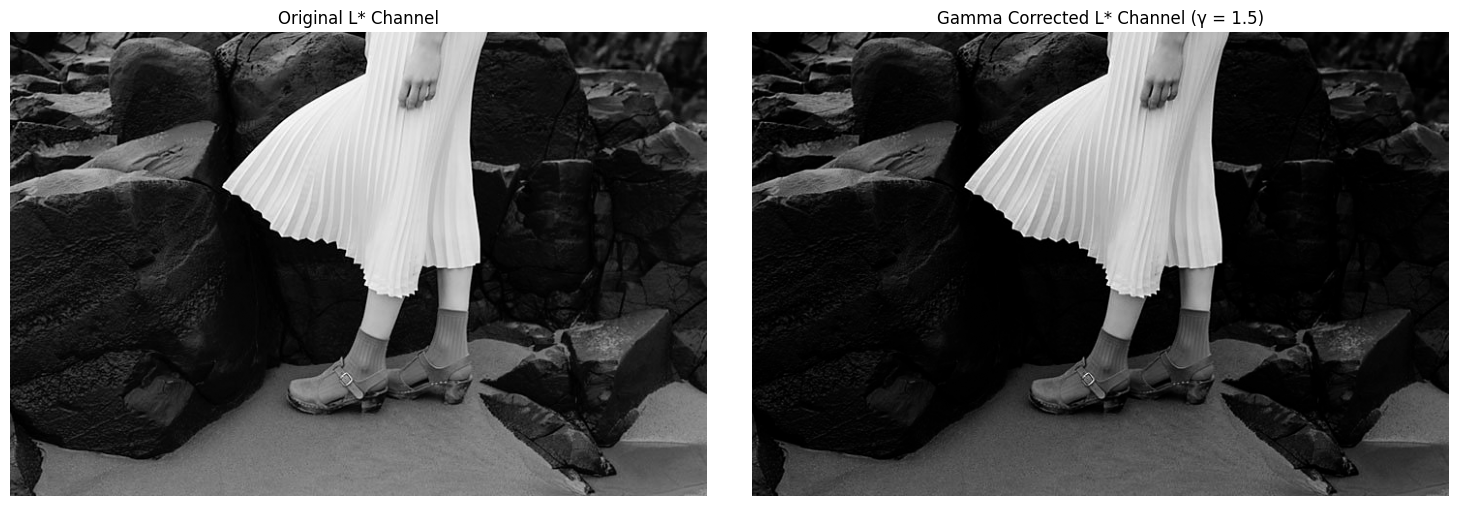

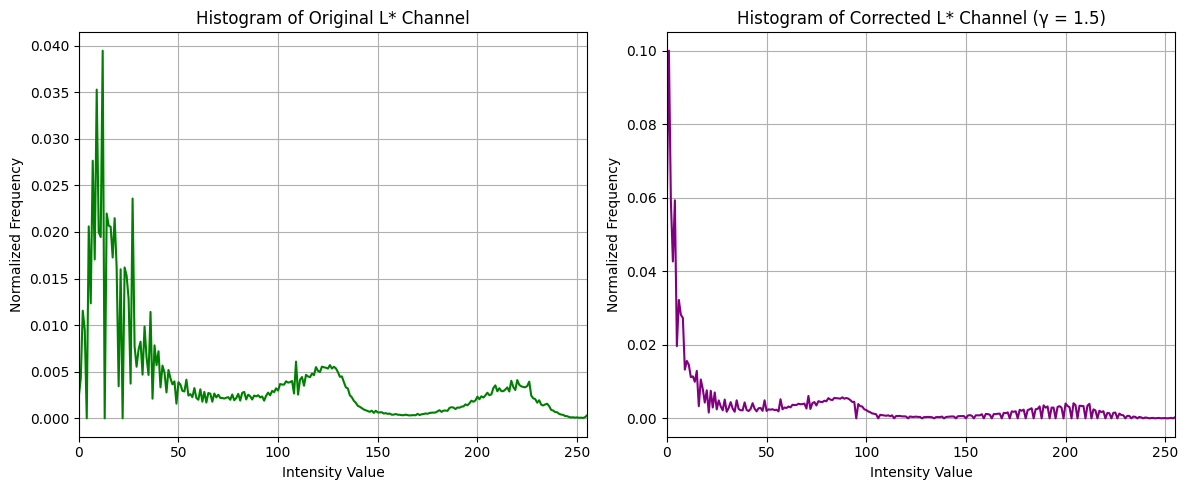

Applied gamma correction with γ = 1.5
Gamma correction formula: Output = Input^γ
For γ > 1 (like 1.5), the image becomes darker (reduces brightness)
For γ < 1, the image becomes brighter (increases brightness)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a sample image if not available
def create_sample_image():
    # Create a synthetic image with various colors and intensities
    img = np.zeros((300, 400, 3), dtype=np.uint8)

    # Add gradient background
    for i in range(300):
        for j in range(400):
            img[i, j] = [j//1.5, i//1.5, (i+j)//3]

    # Add some colored rectangles
    cv2.rectangle(img, (50, 50), (150, 100), (255, 0, 0), -1)     # Red
    cv2.rectangle(img, (200, 50), (300, 100), (0, 255, 0), -1)    # Green
    cv2.rectangle(img, (50, 150), (150, 200), (0, 0, 255), -1)    # Blue
    cv2.rectangle(img, (200, 150), (300, 200), (255, 255, 0), -1) # Cyan
    cv2.rectangle(img, (50, 250), (150, 300), (255, 0, 255), -1)  # Magenta
    cv2.rectangle(img, (200, 250), (300, 300), (0, 255, 255), -1) # Yellow

    # Add some text
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, 'Gamma Correction', (100, 30), font, 0.7, (255, 255, 255), 2)

    return img

# Load or create the image
img_path = 'image/highlights_and_shadows.jpg'
img = cv2.imread(img_path)

if img is None:
    print("Creating sample image for demonstration")
    img = create_sample_image()
else:
    # Convert from BGR to RGB for display
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display original image
plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Convert to L*a*b* color space
lab_img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

# Split into L*, a*, and b* channels
L, a, b = cv2.split(lab_img)

# Normalize L* channel to [0, 1] range for gamma correction
L_normalized = L.astype(np.float32) / 255.0

# Apply gamma correction to L* channel
gamma = 1.5  # Gamma value - you can adjust this
L_corrected = np.power(L_normalized, gamma)

# Scale back to [0, 255] range and convert to uint8
L_corrected = (L_corrected * 255).astype(np.uint8)

# Merge corrected L* channel with original a* and b* channels
lab_corrected = cv2.merge([L_corrected, a, b])

# Convert back to RGB color space
corrected_img = cv2.cvtColor(lab_corrected, cv2.COLOR_LAB2RGB)

# Display original and corrected images
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].imshow(img)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(corrected_img)
axes[1].set_title(f'Gamma Corrected Image (γ = {gamma})')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Calculate histograms
# For the original image
original_hist = cv2.calcHist([img], [0], None, [256], [0, 256])
original_hist = original_hist / original_hist.sum()  # Normalize

# For the corrected image
corrected_hist = cv2.calcHist([corrected_img], [0], None, [256], [0, 256])
corrected_hist = corrected_hist / corrected_hist.sum()  # Normalize

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(original_hist, color='blue')
plt.title('Histogram of Original Image')
plt.xlabel('Intensity Value')
plt.ylabel('Normalized Frequency')
plt.xlim([0, 255])
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(corrected_hist, color='red')
plt.title(f'Histogram after Gamma Correction (γ = {gamma})')
plt.xlabel('Intensity Value')
plt.ylabel('Normalized Frequency')
plt.xlim([0, 255])
plt.grid(True)

plt.tight_layout()
plt.show()

# Display L* channel before and after correction
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].imshow(L, cmap='gray')
axes[0].set_title('Original L* Channel')
axes[0].axis('off')

axes[1].imshow(L_corrected, cmap='gray')
axes[1].set_title(f'Gamma Corrected L* Channel (γ = {gamma})')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Calculate and display histograms of L* channel
L_hist = cv2.calcHist([L], [0], None, [256], [0, 256])
L_hist = L_hist / L_hist.sum()  # Normalize

L_corrected_hist = cv2.calcHist([L_corrected], [0], None, [256], [0, 256])
L_corrected_hist = L_corrected_hist / L_corrected_hist.sum()  # Normalize

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(L_hist, color='green')
plt.title('Histogram of Original L* Channel')
plt.xlabel('Intensity Value')
plt.ylabel('Normalized Frequency')
plt.xlim([0, 255])
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(L_corrected_hist, color='purple')
plt.title(f'Histogram of Corrected L* Channel (γ = {gamma})')
plt.xlabel('Intensity Value')
plt.ylabel('Normalized Frequency')
plt.xlim([0, 255])
plt.grid(True)

plt.tight_layout()
plt.show()

# Print the gamma value used
print(f"Applied gamma correction with γ = {gamma}")
print("Gamma correction formula: Output = Input^γ")
print(f"For γ > 1 (like {gamma}), the image becomes darker (reduces brightness)")
print("For γ < 1, the image becomes brighter (increases brightness)")

4. Increasing the vibrance of a photograph is probably achieved by applying an intensity transformation

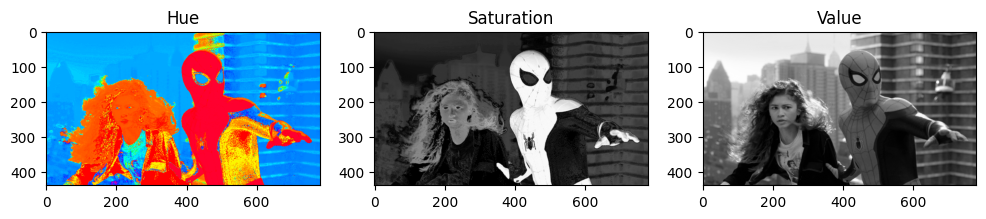

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('image/spider.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

plt.figure(figsize=(12,4))
plt.subplot(131); plt.imshow(h, cmap="hsv"); plt.title("Hue")
plt.subplot(132); plt.imshow(s, cmap="gray"); plt.title("Saturation")
plt.subplot(133); plt.imshow(v, cmap="gray"); plt.title("Value")
plt.show()


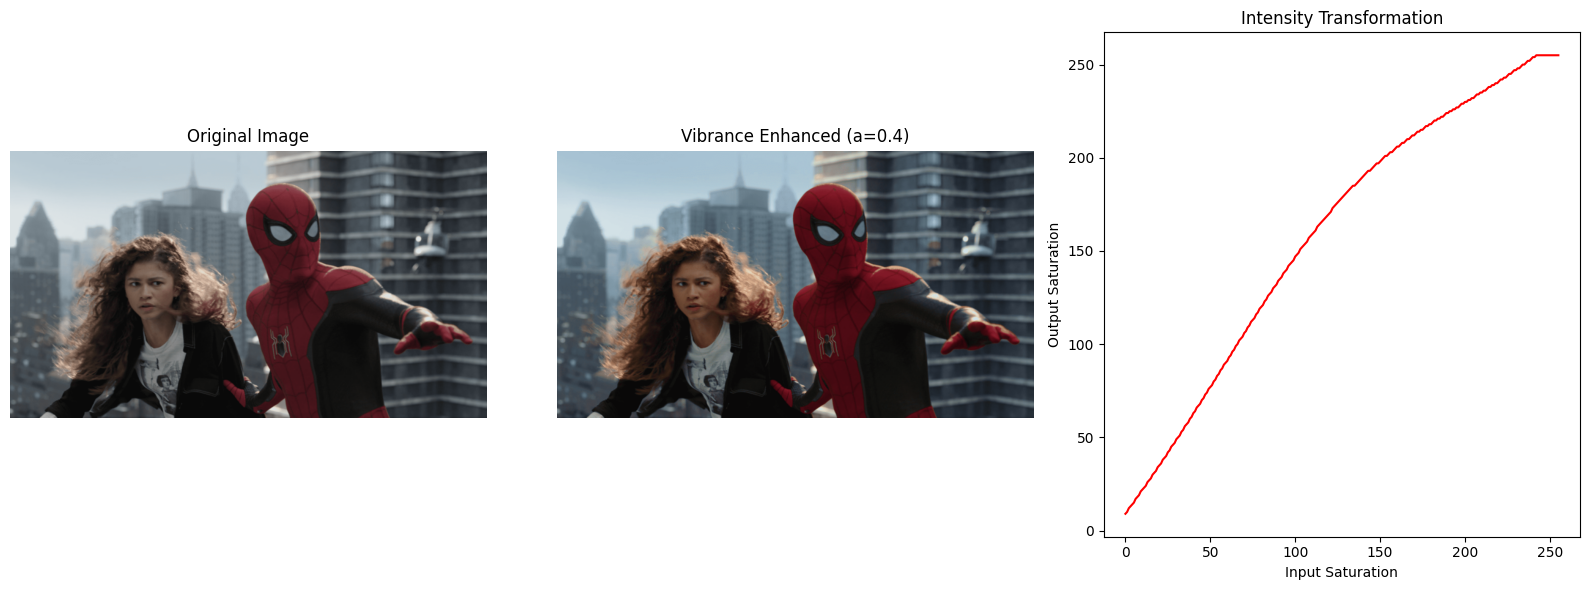

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('image/spider.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

sigma = 70
a = 0.4

x = np.arange(256)
transformation = np.minimum(
    x + a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2)), 255
).astype(np.uint8)

s_transformed = cv2.LUT(s, transformation)

hsv_enhanced = cv2.merge([h, s_transformed, v])
img_vibrant = cv2.cvtColor(hsv_enhanced, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(16,6))

plt.subplot(131); plt.imshow(img_rgb); plt.title("Original Image"); plt.axis("off")
plt.subplot(132); plt.imshow(img_vibrant); plt.title(f"Vibrance Enhanced (a={a})"); plt.axis("off")
plt.subplot(133); plt.plot(x, transformation, color="red");
plt.title("Intensity Transformation");
plt.xlabel("Input Saturation"); plt.ylabel("Output Saturation")

plt.tight_layout()
plt.show()


5. In this question, we will apply histogram equalization only to the foreground of an image to produce an
image with a histogram equalized foreground

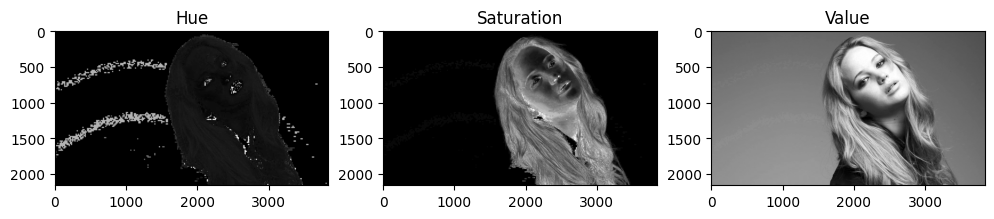

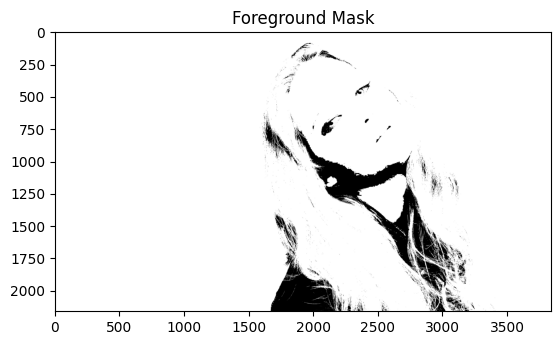

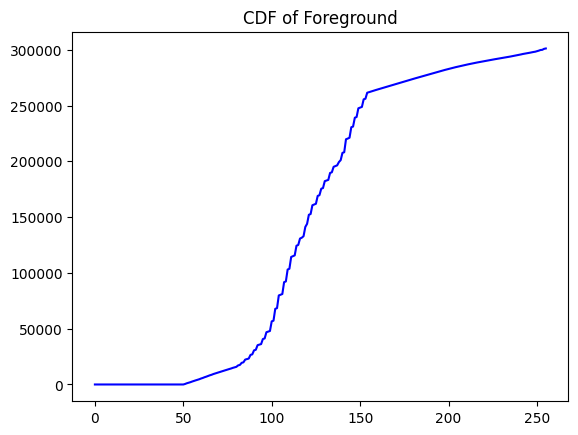

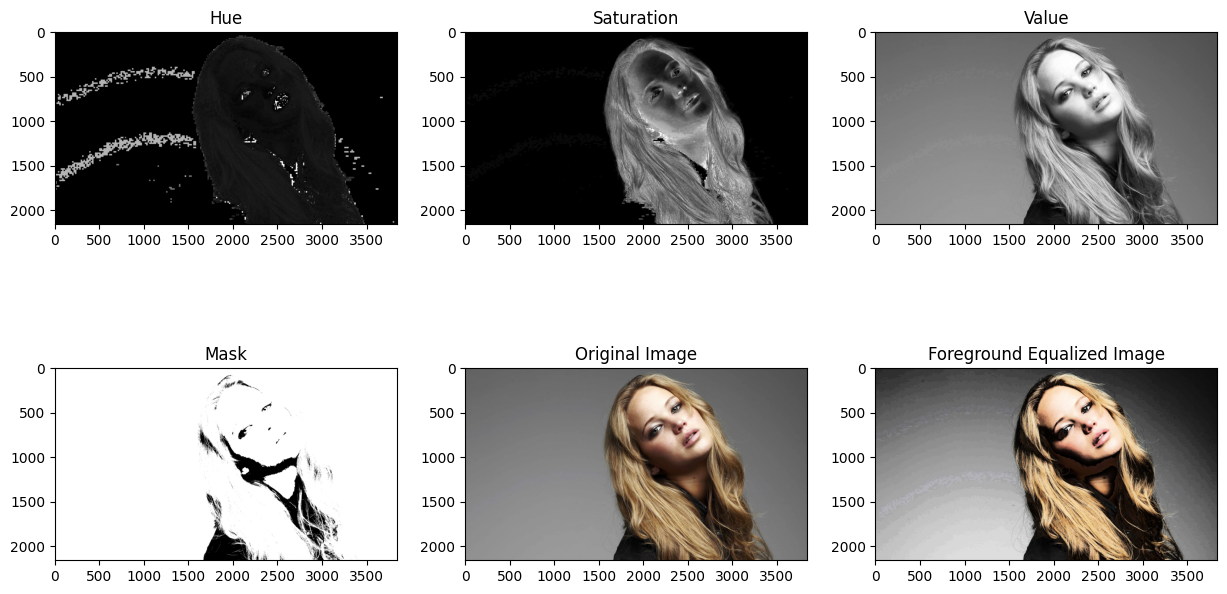

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# (a)
img = cv2.imread('image/jeniffer.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)


plt.figure(figsize=(12,4))
plt.subplot(131); plt.imshow(h, cmap="gray"); plt.title("Hue")
plt.subplot(132); plt.imshow(s, cmap="gray"); plt.title("Saturation")
plt.subplot(133); plt.imshow(v, cmap="gray"); plt.title("Value")
plt.show()

#(b)
_, mask = cv2.threshold(v, 50, 255, cv2.THRESH_BINARY)
plt.imshow(mask, cmap="gray"); plt.title("Foreground Mask"); plt.show()

#(c)
foreground = cv2.bitwise_and(v, v, mask=mask)

#(d)
hist, _ = np.histogram(foreground[foreground > 0], bins=256, range=[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

plt.plot(cdf_normalized, color="b")
plt.title("CDF of Foreground")
plt.show()

#(e)
cdf_m = np.ma.masked_equal(cdf, 0)  # mask zeros
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')

equalized_foreground = cdf_final[foreground]

#(f
background = cv2.bitwise_and(v, v, mask=cv2.bitwise_not(mask))
v_new = cv2.add(background, equalized_foreground)

hsv_new = cv2.merge([h, s, v_new])
img_final = cv2.cvtColor(hsv_new, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(15,8))
plt.subplot(231); plt.imshow(h, cmap="gray"); plt.title("Hue")
plt.subplot(232); plt.imshow(s, cmap="gray"); plt.title("Saturation")
plt.subplot(233); plt.imshow(v, cmap="gray"); plt.title("Value")
plt.subplot(234); plt.imshow(mask, cmap="gray"); plt.title("Mask")
plt.subplot(235); plt.imshow(img_rgb); plt.title("Original Image")
plt.subplot(236); plt.imshow(img_final); plt.title("Foreground Equalized Image")
plt.show()


6. Filtering with the Sobel operator can compute the gradient. Consider the image shown in Fig. 6

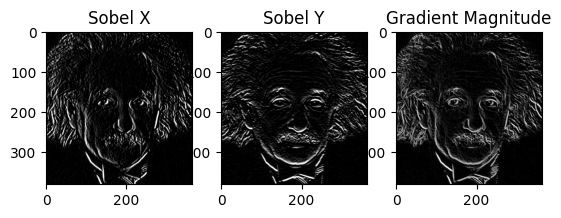

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('image/einstein.png', cv2.IMREAD_GRAYSCALE)

sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])


grad_x = cv2.filter2D(img, -1, sobel_x)
grad_y = cv2.filter2D(img, -1, sobel_y)


grad_mag = cv2.magnitude(grad_x.astype(np.float32), grad_y.astype(np.float32))


plt.subplot(1, 3, 1), plt.imshow(grad_x, cmap='gray'), plt.title('Sobel X')
plt.subplot(1, 3, 2), plt.imshow(grad_y, cmap='gray'), plt.title('Sobel Y')
plt.subplot(1, 3, 3), plt.imshow(grad_mag, cmap='gray'), plt.title('Gradient Magnitude')
plt.show()


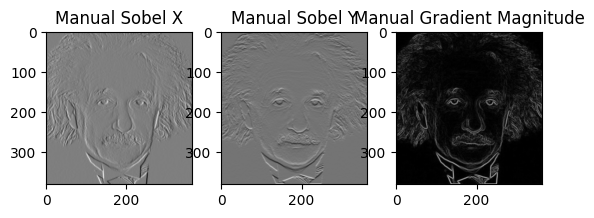

In [14]:
def convolve2d(image, kernel):
    h, w = image.shape
    kh, kw = kernel.shape
    pad_h = kh // 2
    pad_w = kw // 2
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    output = np.zeros_like(image, dtype=float)

    for i in range(h):
        for j in range(w):
            region = padded[i:i+kh, j:j+kw]
            output[i, j] = np.sum(region * kernel)
    return output


grad_x_manual = convolve2d(img, sobel_x)
grad_y_manual = convolve2d(img, sobel_y)
grad_mag_manual = np.sqrt(grad_x_manual**2 + grad_y_manual**2)


plt.subplot(1, 3, 1), plt.imshow(grad_x_manual, cmap='gray'), plt.title('Manual Sobel X')
plt.subplot(1, 3, 2), plt.imshow(grad_y_manual, cmap='gray'), plt.title('Manual Sobel Y')
plt.subplot(1, 3, 3), plt.imshow(grad_mag_manual, cmap='gray'), plt.title('Manual Gradient Magnitude')
plt.show()


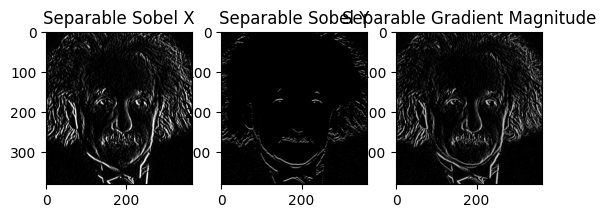

In [15]:

Gx_vertical = np.array([[1], [2], [1]])
Gx_horizontal = np.array([[1, 0, -1]])

temp_x = cv2.filter2D(img, -1, Gx_horizontal)
grad_x_sep = cv2.filter2D(temp_x, -1, Gx_vertical)

Gy_vertical = np.array([[1], [0], [-1]])
Gy_horizontal = np.array([[1, 2, 1]])

temp_y = cv2.filter2D(img, -1, Gy_horizontal)
grad_y_sep = cv2.filter2D(temp_y, -1, Gy_vertical)

grad_mag_sep = cv2.magnitude(grad_x_sep.astype(np.float32), grad_y_sep.astype(np.float32))

plt.subplot(1, 3, 1), plt.imshow(grad_x_sep, cmap='gray'), plt.title('Separable Sobel X')
plt.subplot(1, 3, 2), plt.imshow(grad_y_sep, cmap='gray'), plt.title('Separable Sobel Y')
plt.subplot(1, 3, 3), plt.imshow(grad_mag_sep, cmap='gray'), plt.title('Separable Gradient Magnitude')
plt.show()


7. Write a program to zoom images by a given factor s ∈ (0,10]. You must use a function to zoom the image,
which can handle

Normalized SSD (Nearest Neighbor): 261.26
Normalized SSD (Bilinear): 200.25


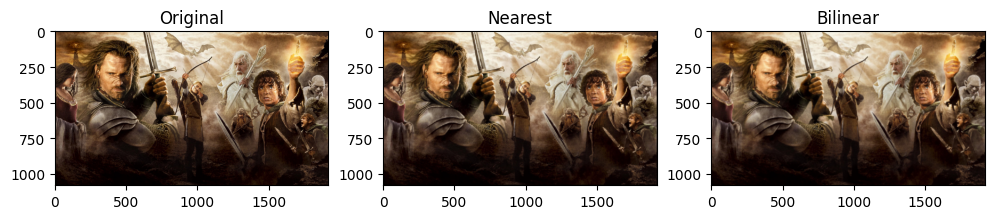

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def zoom_image(img, scale, method='nearest'):
    src_h, src_w = img.shape[:2]
    dst_h, dst_w = int(src_h * scale), int(src_w * scale)
    zoomed = np.zeros((dst_h, dst_w, img.shape[2]), dtype=np.uint8)

    for y in range(dst_h):
        for x in range(dst_w):
            src_x = x / scale
            src_y = y / scale

            if method == 'nearest':
                nearest_x = int(round(src_x))
                nearest_y = int(round(src_y))
                if nearest_x < src_w and nearest_y < src_h:
                    zoomed[y, x] = img[min(nearest_y, src_h - 1), min(nearest_x, src_w - 1)]

            elif method == 'bilinear':
                x0 = int(np.floor(src_x))
                x1 = min(x0 + 1, src_w - 1)
                y0 = int(np.floor(src_y))
                y1 = min(y0 + 1, src_h - 1)

                dx = src_x - x0
                dy = src_y - y0

                for c in range(img.shape[2]):
                    top = (1 - dx) * img[y0, x0, c] + dx * img[y0, x1, c]
                    bottom = (1 - dx) * img[y1, x0, c] + dx * img[y1, x1, c]
                    value = (1 - dy) * top + dy * bottom
                    zoomed[y, x, c] = np.clip(value, 0, 255)

    return zoomed

def normalized_ssd(img1, img2):
    diff = img1.astype(np.float32) - img2.astype(np.float32)
    ssd = np.sum(diff ** 2)
    norm_ssd = ssd / (img1.shape[0] * img1.shape[1] * img1.shape[2])
    return norm_ssd

original = cv2.imread("image/im01.png")
downsampled = cv2.imread("image/im01small.png")

zoomed_nearest = zoom_image(downsampled, scale=4, method='nearest')
zoomed_bilinear = zoom_image(downsampled, scale=4, method='bilinear')

ssd_nearest = normalized_ssd(original, zoomed_nearest)
ssd_bilinear = normalized_ssd(original, zoomed_bilinear)

print(f"Normalized SSD (Nearest Neighbor): {ssd_nearest:.2f}")
print(f"Normalized SSD (Bilinear): {ssd_bilinear:.2f}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB)); plt.title("Original")
plt.subplot(1, 3, 2); plt.imshow(cv2.cvtColor(zoomed_nearest, cv2.COLOR_BGR2RGB)); plt.title("Nearest")
plt.subplot(1, 3, 3); plt.imshow(cv2.cvtColor(zoomed_bilinear, cv2.COLOR_BGR2RGB)); plt.title("Bilinear")
plt.show()


Normalized SSD (Nearest Neighbor): 87.37
Normalized SSD (Bilinear): 48.96


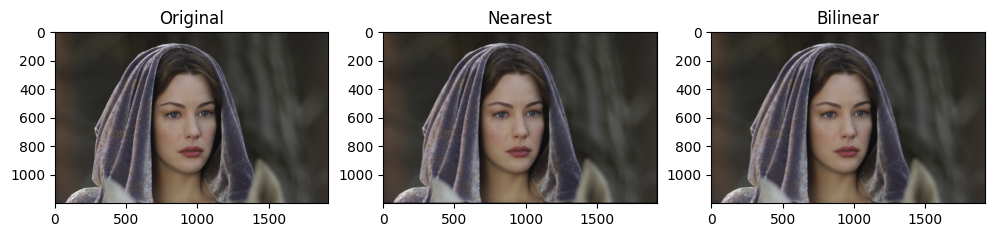

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def zoom_image(img, scale, method='nearest'):
    src_h, src_w = img.shape[:2]
    dst_h, dst_w = int(src_h * scale), int(src_w * scale)
    zoomed = np.zeros((dst_h, dst_w, img.shape[2]), dtype=np.uint8)

    for y in range(dst_h):
        for x in range(dst_w):
            src_x = x / scale
            src_y = y / scale

            if method == 'nearest':
                nearest_x = int(round(src_x))
                nearest_y = int(round(src_y))
                if nearest_x < src_w and nearest_y < src_h:
                    zoomed[y, x] = img[min(nearest_y, src_h - 1), min(nearest_x, src_w - 1)]

            elif method == 'bilinear':
                x0 = int(np.floor(src_x))
                x1 = min(x0 + 1, src_w - 1)
                y0 = int(np.floor(src_y))
                y1 = min(y0 + 1, src_h - 1)

                dx = src_x - x0
                dy = src_y - y0

                for c in range(img.shape[2]):
                    top = (1 - dx) * img[y0, x0, c] + dx * img[y0, x1, c]
                    bottom = (1 - dx) * img[y1, x0, c] + dx * img[y1, x1, c]
                    value = (1 - dy) * top + dy * bottom
                    zoomed[y, x, c] = np.clip(value, 0, 255)

    return zoomed

def normalized_ssd(img1, img2):
    diff = img1.astype(np.float32) - img2.astype(np.float32)
    ssd = np.sum(diff ** 2)
    norm_ssd = ssd / (img1.shape[0] * img1.shape[1] * img1.shape[2])
    return norm_ssd

original = cv2.imread("image/im02.png")
downsampled = cv2.imread("image/im02small.png")

zoomed_nearest = zoom_image(downsampled, scale=4, method='nearest')
zoomed_bilinear = zoom_image(downsampled, scale=4, method='bilinear')

ssd_nearest = normalized_ssd(original, zoomed_nearest)
ssd_bilinear = normalized_ssd(original, zoomed_bilinear)

print(f"Normalized SSD (Nearest Neighbor): {ssd_nearest:.2f}")
print(f"Normalized SSD (Bilinear): {ssd_bilinear:.2f}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB)); plt.title("Original")
plt.subplot(1, 3, 2); plt.imshow(cv2.cvtColor(zoomed_nearest, cv2.COLOR_BGR2RGB)); plt.title("Nearest")
plt.subplot(1, 3, 3); plt.imshow(cv2.cvtColor(zoomed_bilinear, cv2.COLOR_BGR2RGB)); plt.title("Bilinear")
plt.show()


8. Fig. 72 shows a flower image with both the foreground and background are in focus.

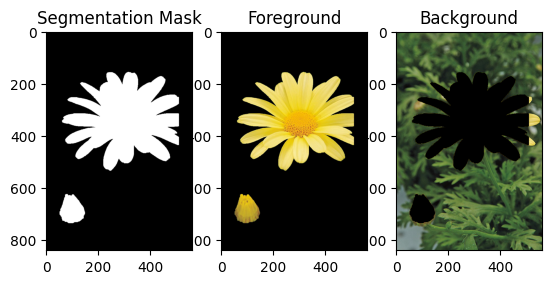

In [18]:
img = cv2.imread('image/daisy.jpg')
mask = np.zeros(img.shape[:2], np.uint8)

bgModel = np.zeros((1, 65), np.float64)
fgModel = np.zeros((1, 65), np.float64)

rect = (50, 50, img.shape[1] - 100, img.shape[0] - 100)

cv2.grabCut(img, mask, rect, bgModel, fgModel, 5, cv2.GC_INIT_WITH_RECT)

seg_mask = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

foreground = img * seg_mask[:, :, np.newaxis]
background = img * (1 - seg_mask[:, :, np.newaxis])

plt.subplot(1, 3, 1); plt.imshow(seg_mask, cmap='gray'); plt.title("Segmentation Mask")
plt.subplot(1, 3, 2); plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB)); plt.title("Foreground")
plt.subplot(1, 3, 3); plt.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB)); plt.title("Background")
plt.show()


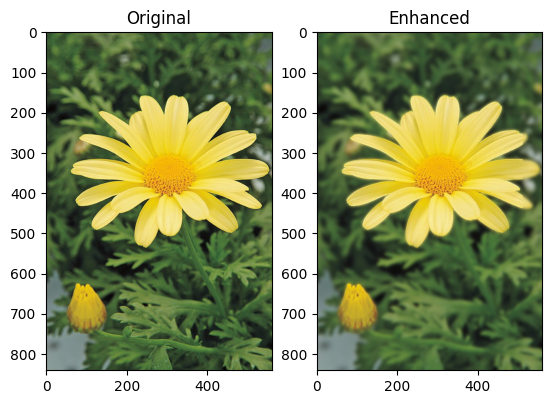

In [19]:

blurred_background = cv2.GaussianBlur(img, (21, 21), 0)

enhanced = blurred_background.copy()
enhanced[seg_mask == 1] = img[seg_mask == 1]

plt.subplot(1, 2, 1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Original")
plt.subplot(1, 2, 2); plt.imshow(cv2.cvtColor(enhanced, cv2.COLOR_BGR2RGB)); plt.title("Enhanced")
plt.show()


9. Consider the rice image shown in Fig. 8.

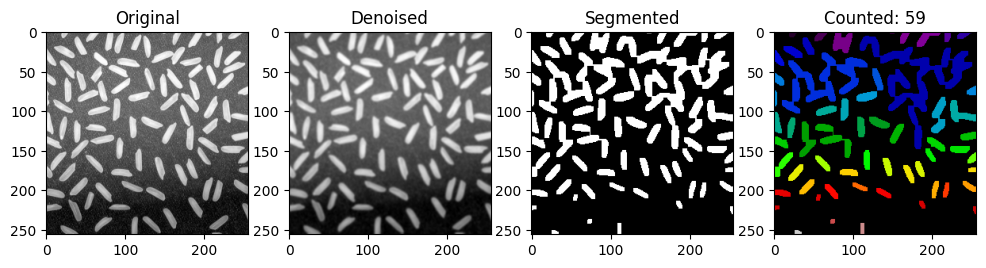

Number of rice grains: 59


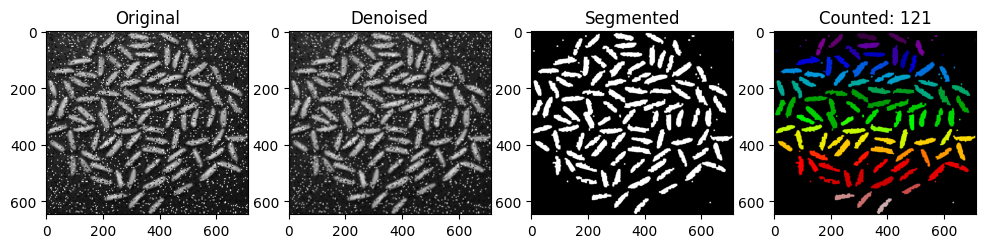

Number of rice grains: 121


In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # (a/b) Noise Removal
    denoised = cv2.GaussianBlur(img, (5, 5), 0)

    # (c) Otsu's Thresholding
    _, binary = cv2.threshold(denoised, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # (d) Morphological Operations
    kernel = np.ones((3,3), np.uint8)
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=2)

    # (e) Connected Components to Count Rice Grains
    num_labels, labels = cv2.connectedComponents(closing)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 4, 1); plt.imshow(img, cmap='gray'); plt.title("Original")
    plt.subplot(1, 4, 2); plt.imshow(denoised, cmap='gray'); plt.title("Denoised")
    plt.subplot(1, 4, 3); plt.imshow(closing, cmap='gray'); plt.title("Segmented")
    plt.subplot(1, 4, 4); plt.imshow(labels, cmap='nipy_spectral'); plt.title(f"Counted: {num_labels - 1}")
    plt.show()

    print(f"Number of rice grains: {num_labels - 1}")
    return num_labels - 1

rice_count_8a = preprocess_image("image/rice.png")
rice_count_8b = preprocess_image("image/rice2.png")


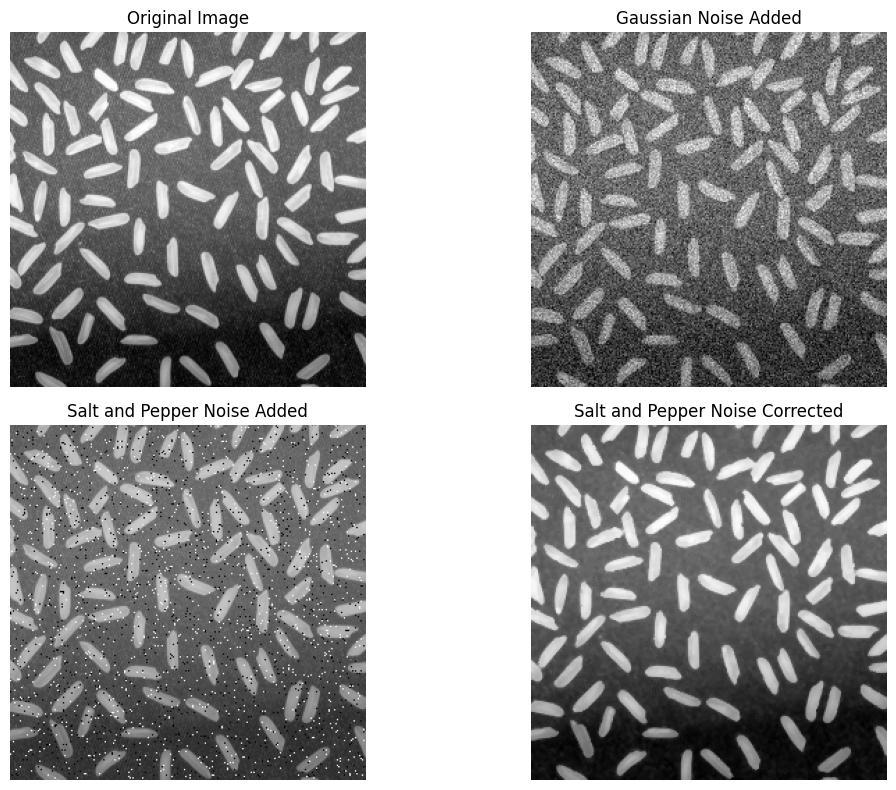

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('image/rice.png', cv2.IMREAD_GRAYSCALE)

mean = 0
sigma = 25
gaussian_noise = np.random.normal(mean, sigma, img.shape)
gaussian_noisy_img = img + gaussian_noise
gaussian_noisy_img = np.clip(gaussian_noisy_img, 0, 255).astype(np.uint8)

def salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy = np.copy(image)
    num_salt = np.ceil(salt_prob * image.size)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy[coords[0], coords[1]] = 255

    num_pepper = np.ceil(pepper_prob * image.size)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy[coords[0], coords[1]] = 0

    return noisy

sp_noisy_img = salt_and_pepper_noise(img, 0.02, 0.02)

sp_denoised_img = cv2.medianBlur(sp_noisy_img, 3)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Gaussian Noise Added')
plt.imshow(gaussian_noisy_img, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Salt and Pepper Noise Added')
plt.imshow(sp_noisy_img, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Salt and Pepper Noise Corrected')
plt.imshow(sp_denoised_img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


10. Fig. 9 shows a an image of two sapphires placed on a table. The optical axis is perpendicular to the surface
of the table

Areas in pixels: [30059 30042]
Actual areas in mm^2: [8.34972222 8.345     ]


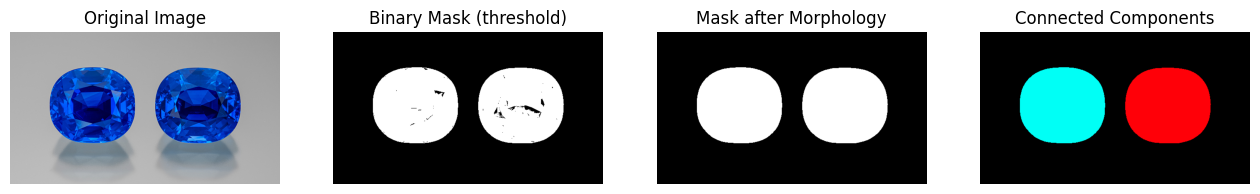

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('image/sapphire.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_blue = np.array([100, 150, 50])
upper_blue = np.array([140, 255, 255])
mask = cv2.inRange(hsv, lower_blue, upper_blue)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
mask_closed = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

mask_floodfill = mask_closed.copy()
h, w = mask_floodfill.shape[:2]
mask_floodfill_inv = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(mask_floodfill, mask_floodfill_inv, (0,0), 255)
mask_filled = cv2.bitwise_or(mask_closed, cv2.bitwise_not(mask_floodfill))

num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask_filled, connectivity=8)

areas_pixels = stats[1:, cv2.CC_STAT_AREA]

print(f"Areas in pixels: {areas_pixels}")

f = 8
d = 480

scale_factor = (f / d) ** 2
areas_actual = areas_pixels * scale_factor

print(f"Actual areas in mm^2: {areas_actual}")

fig, axs = plt.subplots(1, 4, figsize=(16, 5))
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(mask, cmap='gray')
axs[1].set_title('Binary Mask (threshold)')
axs[1].axis('off')

axs[2].imshow(mask_filled, cmap='gray')
axs[2].set_title('Mask after Morphology')
axs[2].axis('off')

label_hue = np.uint8(179 * labels / np.max(labels))
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2RGB)
labeled_img[label_hue == 0] = 0

axs[3].imshow(labeled_img)
axs[3].set_title('Connected Components')
axs[3].axis('off')

plt.show()
